# **Case Study Assignement 1**

TSQR that divides an
input matrix up into four blocks of rows (using row sub-indexing) and the
QR-factorisation by communication-avoiding factorisations.

In [5]:
import numpy as np
from scipy.linalg import qr
import matplotlib.pyplot as plt

In [ ]:
def tsqr(A):
    m, n = A.shape
    block_size = m // 4  # Assuming m is divisible by 4

    # Split into four row blocks
    A1 = A[:block_size, :]
    A2 = A[block_size:2*block_size, :]
    A3 = A[2*block_size:3*block_size, :]
    A4 = A[3*block_size:4*block_size, :]

    # Local QR factorizations
    Q1, R1 = qr(A1, mode='economic')
    Q2, R2 = qr(A2, mode='economic')
    Q3, R3 = qr(A3, mode='economic')
    Q4, R4 = qr(A4, mode='economic')

    # Combine R1 and R2
    R_1 = np.vstack((R1, R2))
    Q12, R12 = qr(R_1, mode='economic')

    # Combine R3 and R4
    R_2 = np.vstack((R3, R4))
    Q34, R34 = qr(R_2, mode='economic')

    # Combine R12 and R34
    R_stack_top = np.vstack((R12, R34))
    Q_top, R_final = qr(R_stack_top, mode='economic')

    # Construct the global Q matrix
    # Split intermediate Q matrices
    Q12_1 = Q12[:n, :]
    Q12_2 = Q12[n:, :]

    Q34_1 = Q34[:n, :]
    Q34_2 = Q34[n:, :]

    Q_top1 = Q_top[:n, :]
    Q_top2 = Q_top[n:, :]

    # Compute each part of Q
    Q_1 = Q1 @ Q12_1 @ Q_top1
    Q_2 = Q2 @ Q12_2 @ Q_top1
    Q_3 = Q3 @ Q34_1 @ Q_top2
    Q_4 = Q4 @ Q34_2 @ Q_top2

    # Stack vertically to form Q
    Q = np.vstack((Q_1, Q_2, Q_3, Q_4))

    return Q, R_final

In [ ]:
# Generate a tall matrix (400x10)
A = np.random.randn(400, 10)

# Compute TSQR
Q, R = tsqr(A)

# Verify correctness
print("Reconstruction error:", np.linalg.norm(A - Q @ R))
print("Orthogonality of Q:", np.linalg.norm(Q.T @ Q - np.eye(10)))

## **Q3 Scaling Plot**

C Program in Github repo as **[tsqr_scaling.c ](https://github.com/yashbarot0/casestudy/blob/main/tsqr_scaling.c)**

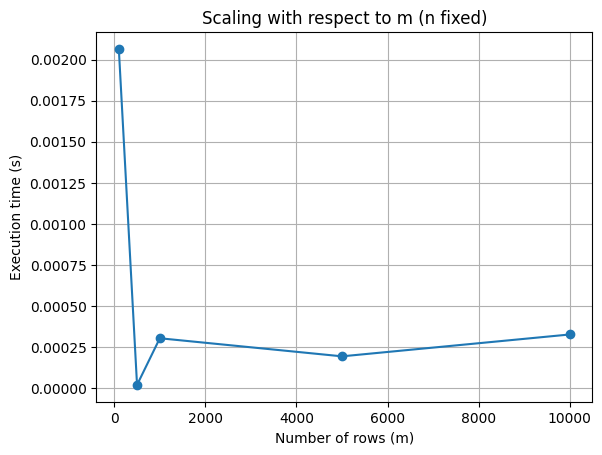

In [3]:
# Data from the program output
m_values = [100, 500, 1000, 5000, 10000]
m_times = [0.002065, 0.000020, 0.000304, 0.000194, 0.000327]

n_values = [4, 8, 16, 32, 64]
n_times = [0.000230, 0.000130, 0.000264, 0.000795, 0.003314]

# Plot scaling with respect to m
plt.figure()
plt.plot(m_values, m_times, marker='o')
plt.xlabel('Number of rows (m)')
plt.ylabel('Execution time (s)')
plt.title('Scaling with respect to m (n fixed)')
plt.grid()
plt.show()

In [ ]:
# Plot scaling with respect to n
plt.figure()
plt.plot(n_values, n_times, marker='o')
plt.xlabel('Number of columns (n)')
plt.ylabel('Execution time (s)')
plt.title('Scaling with respect to n (m fixed)')
plt.grid()
plt.show()